In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.model.instance_hardness import *
from src.utils import *
from src.visualization.plots import *
from src.model.dkdn import *

np.random.seed(1234)

n = 300

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [3]:
y.sum()

600

## Conjunto de datos de train

/home/vacek/anaconda3/envs/dkdn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


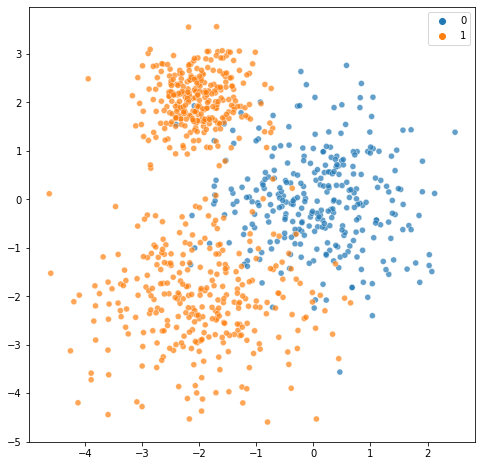

In [4]:
figure, axes = plt.subplots(figsize=[8, 8])

sns.scatterplot(X[:,0],X[:,1], hue=y, alpha=0.7)

plt.show();

In [5]:
figure.savefig('../images/data_artificial.png');

### Cálculo de complejidad

#### KDN

In [6]:
complexity, _ = kdn_score(X, y, 5)

In [29]:
complexity_series = pd.Series(complexity)
complexity_series[complexity_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    199.000000
mean       0.420101
std        0.274134
min        0.200000
10%        0.200000
20%        0.200000
30%        0.200000
40%        0.200000
50%        0.400000
60%        0.400000
70%        0.400000
80%        0.600000
90%        0.840000
max        1.000000
dtype: float64

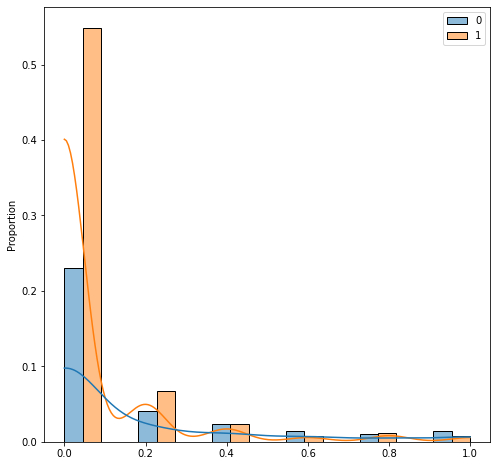

In [8]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [9]:
figure.savefig('../images/kdn_artificial.png');

In [10]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y < 1])
class1_complexity = np.mean(complexity[y > 0])

In [11]:
global_complexity

0.09288888888888888

In [12]:
class1_complexity

0.06633333333333334

In [13]:
class0_complexity

0.146

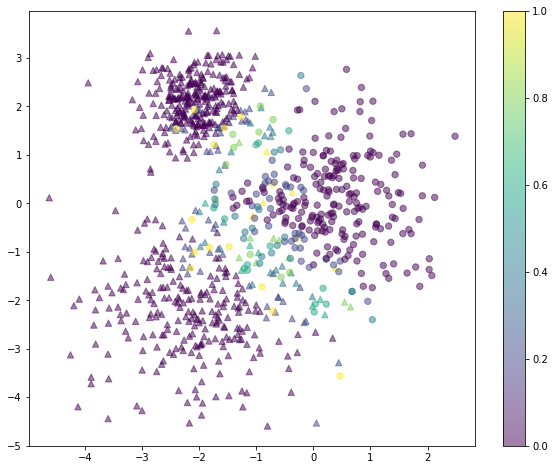

In [14]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity, alpha=0.5, s=area2, marker='o')

plt.colorbar()

plt.show()

In [15]:
figure.savefig('../images/kdn_artificial_scatter.png');

#### Dynamic KDN

In [16]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X, y)
complexity_d = dynamic_kdn.complexity

In [30]:
complexity_d_series = pd.Series(complexity_d)
complexity_d_series[complexity_d_series>0].describe(percentiles=[i*0.1 for i in range(1, 10)])

count    197.000000
mean       0.416345
std        0.283125
min        0.020000
10%        0.140000
20%        0.190000
30%        0.220000
40%        0.250000
50%        0.320000
60%        0.370000
70%        0.510000
80%        0.680000
90%        1.000000
max        1.000000
dtype: float64

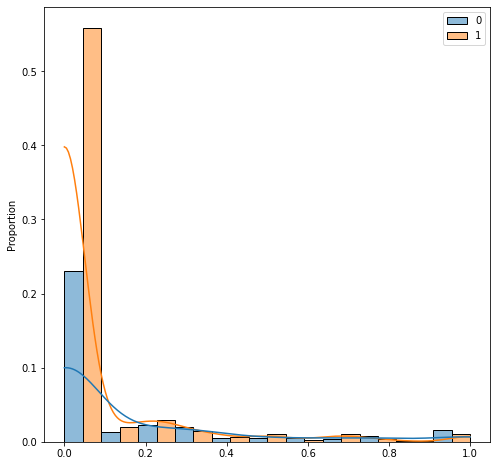

In [18]:
figure, axes = plt.subplots(figsize=[8, 8])
sns.histplot(x=complexity_d, hue=y.astype(int), kde=True, multiple='dodge', stat='proportion');

In [19]:
figure.savefig('../images/ddn_artificial.png');

In [20]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y < 1])
class1_complexity_d = np.mean(complexity_d[y > 0])

In [21]:
global_complexity_d

0.09113333333333334

In [22]:
class1_complexity_d

0.06578333333333333

In [23]:
class0_complexity_d

0.14183333333333334

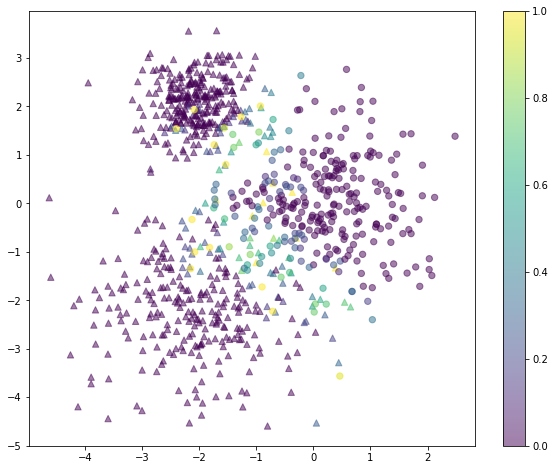

In [24]:
figure, axes = plt.subplots(figsize=[10, 8])

area1 = np.ma.masked_where(y < 1, y) + 39
area2 = np.ma.masked_where(y > 0 , y) + 40

plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area1, marker='^')
plt.scatter(X[:,0],X[:,1], c=complexity_d, alpha=0.5, s=area2, marker='o')

# for i in np.random.randint(100, size=20):
#     plt.scatter(X_train[dynamic_kdn.support_neighbours[i]][:, 0], X_train[dynamic_kdn.support_neighbours[i]][:, 1], alpha = 0.7, s = 60, marker = 'x', color = 'red')
#     Drawing_uncolored_circle = plt.Circle( X_train[i],
#                                           dynamic_kdn.radius[i],
#                                           fill = False )

#     axes.add_artist( Drawing_uncolored_circle )

# axes.set_aspect( 1 )
plt.colorbar()

plt.show()

In [25]:
figure.savefig('../images/ddn_artificial_scatter.png');